<a href="https://www.kaggle.com/code/pranavmaheshwari2603/company-bankruptcy-prediction?scriptVersionId=146408981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


In [2]:
train=pd.read_csv('/kaggle/input/company-bankruptcy-prediction/data.csv')

In [3]:
train.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
train.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [5]:
train.isnull().sum().sum()

0

No null values

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
train.duplicated().sum()

0

No duplicate values

In [8]:
print(train['Bankrupt?'].value_counts())

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [9]:
print('Number {}% of dataset is stable as of right now '.format(100*train['Bankrupt?'].value_counts()[0]/train.shape[0]))
print('Number {}% of dataset is unstable/Bankrupt  as of right now '.format(100*train['Bankrupt?'].value_counts()[1]/train.shape[0]))

Number 96.77372048687491% of dataset is stable as of right now 
Number 3.2262795131250916% of dataset is unstable/Bankrupt  as of right now 


As the data is highly unbalanced we need to do proper sampling.

Before sampling let's first do EDA.

# EDA

Correlation between features.

Seaborn.diverging_palette() method is used to make a diverging plot between two HUSL colors. 

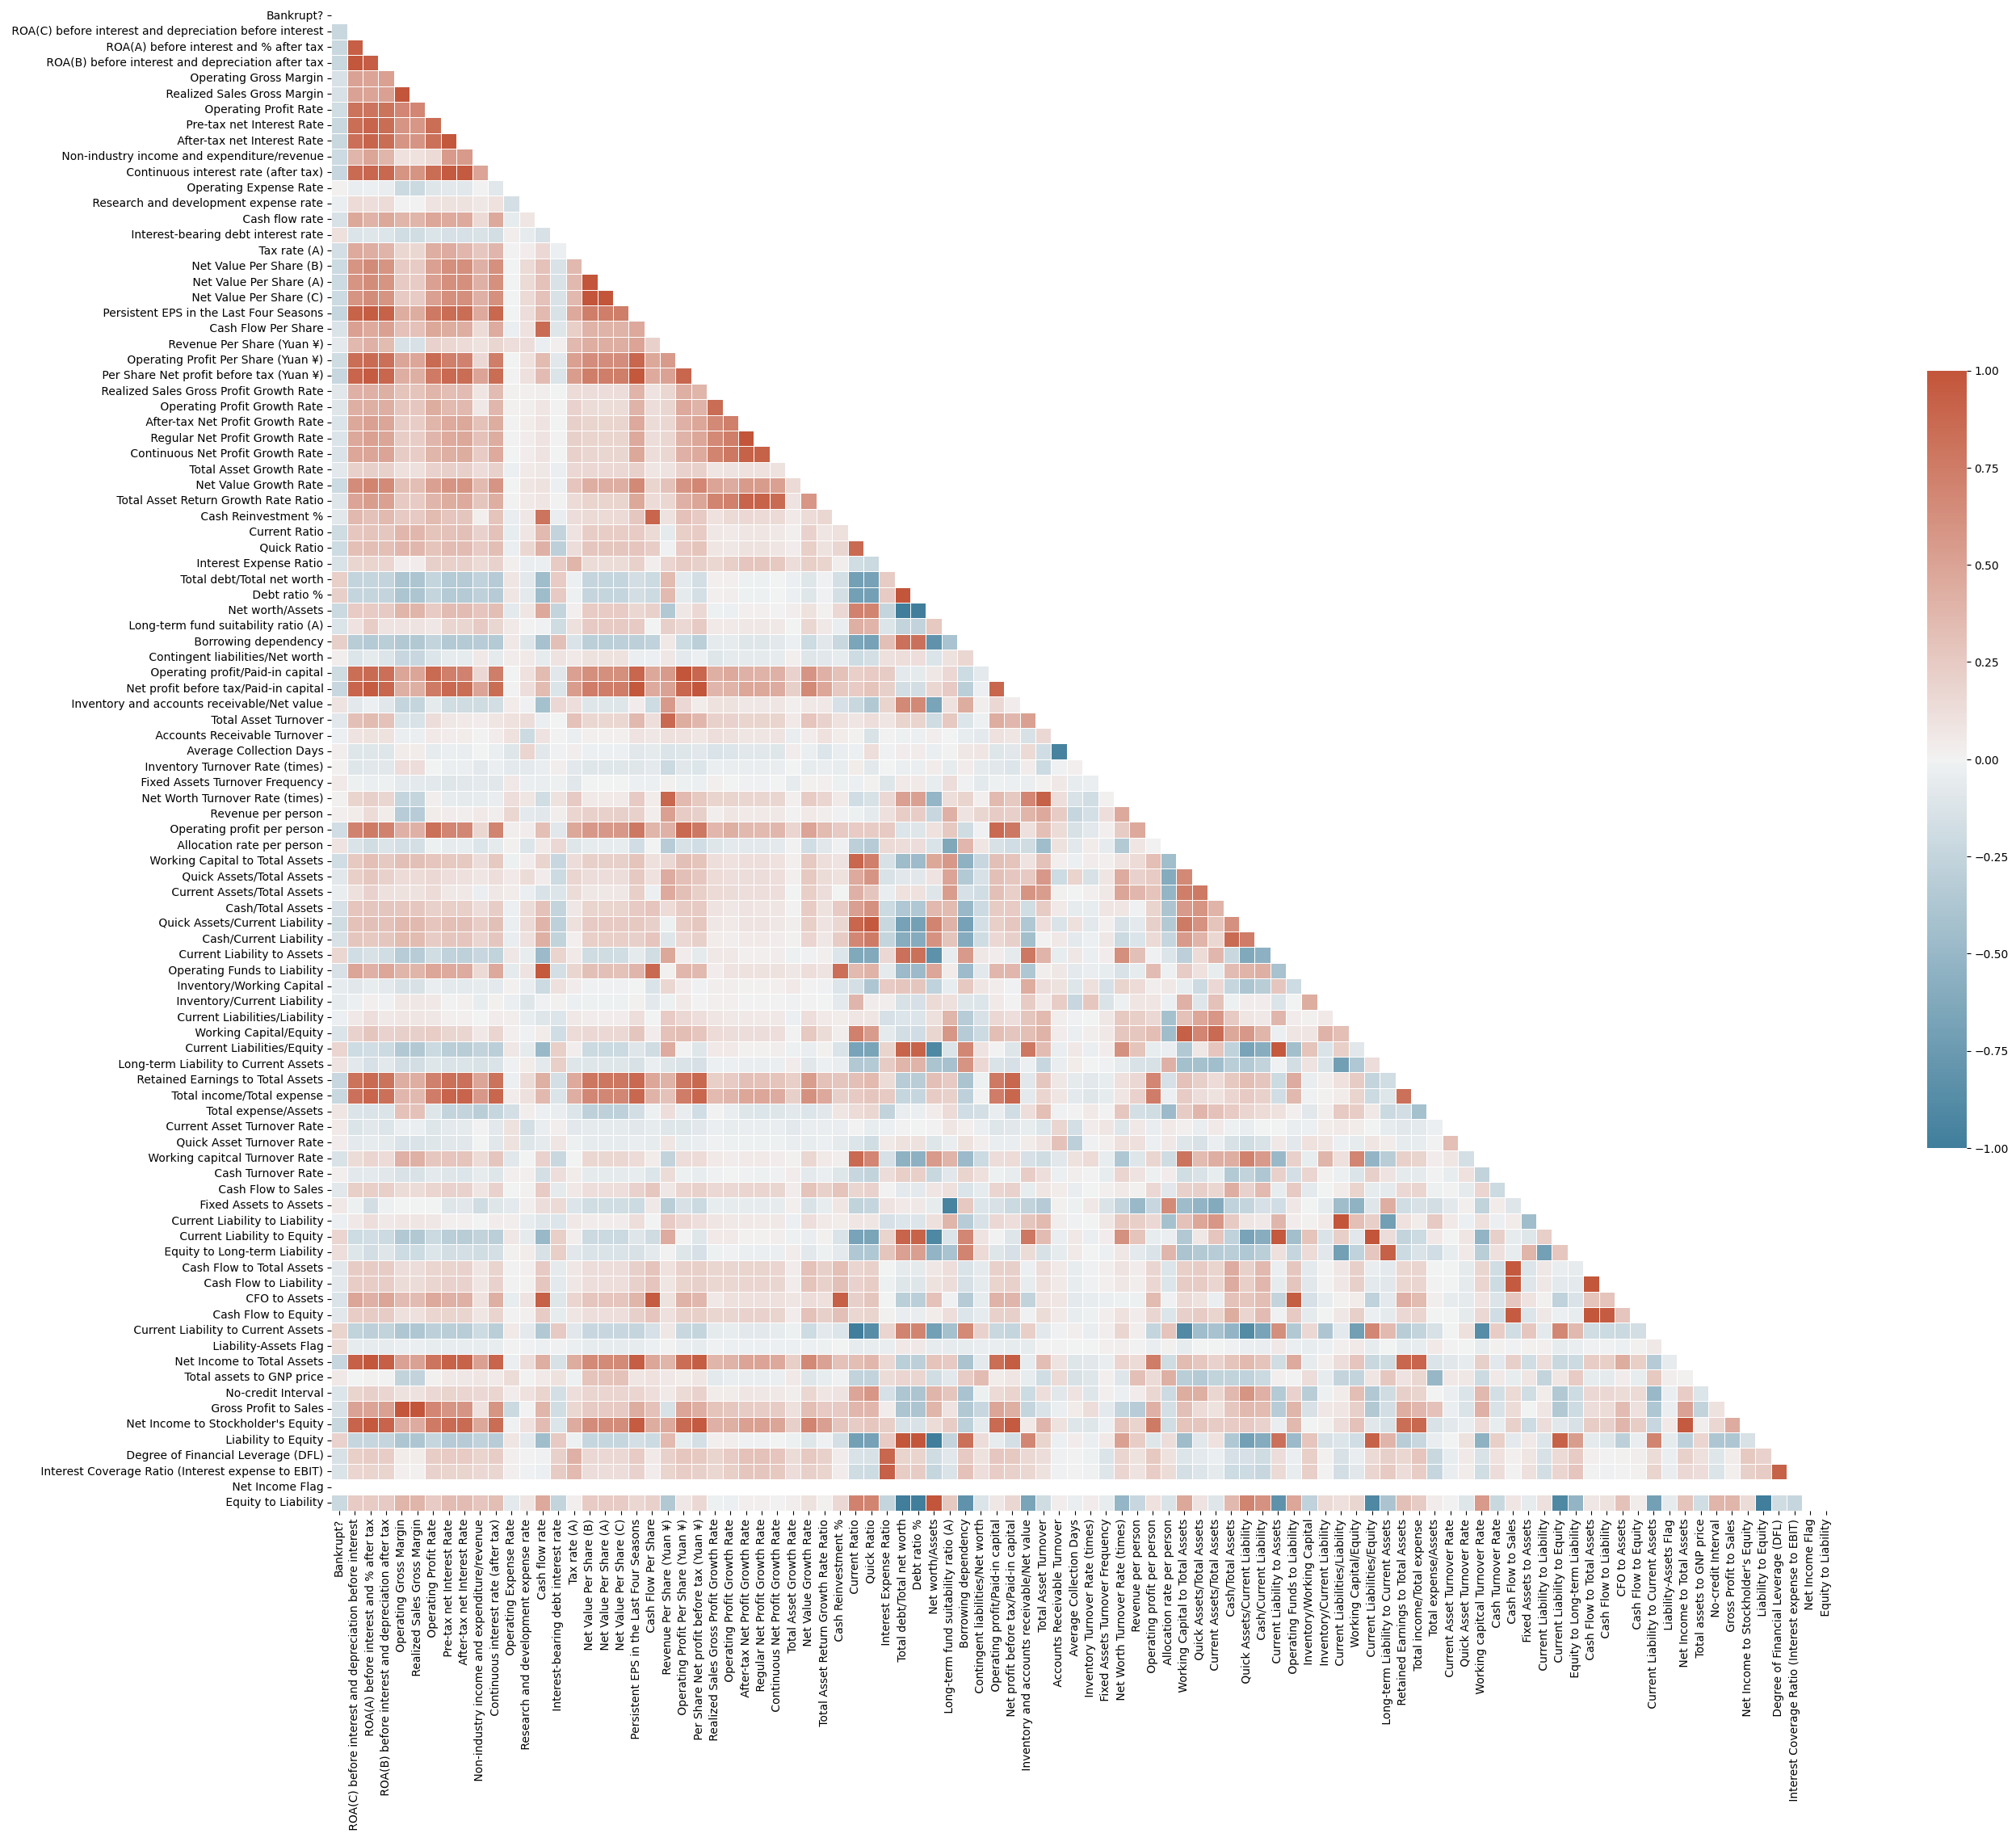

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(30, 25))
#dataplot = sns.heatmap(train.corr(), cmap="YlGnBu") 
#plt.show()

corr = train.corr('spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

We can see that the values are highly correlated if we see top correlated features too there are a number of them so individual based analysis won't be helpful(based on correlation). If want to check uncomment the below code.

In [11]:
#corr = train.corr()
#corr[corr < 1].unstack().transpose().sort_values( ascending=False).drop_duplicates()

##### Let's now check for outliers

orient“v” | “h” | “x” | “y”

Orientation of the plot (vertical or horizontal). This is usually inferred based on the type of the input variables, but it can be used to resolve ambiguity when both x and y are numeric or when plotting wide-form data.

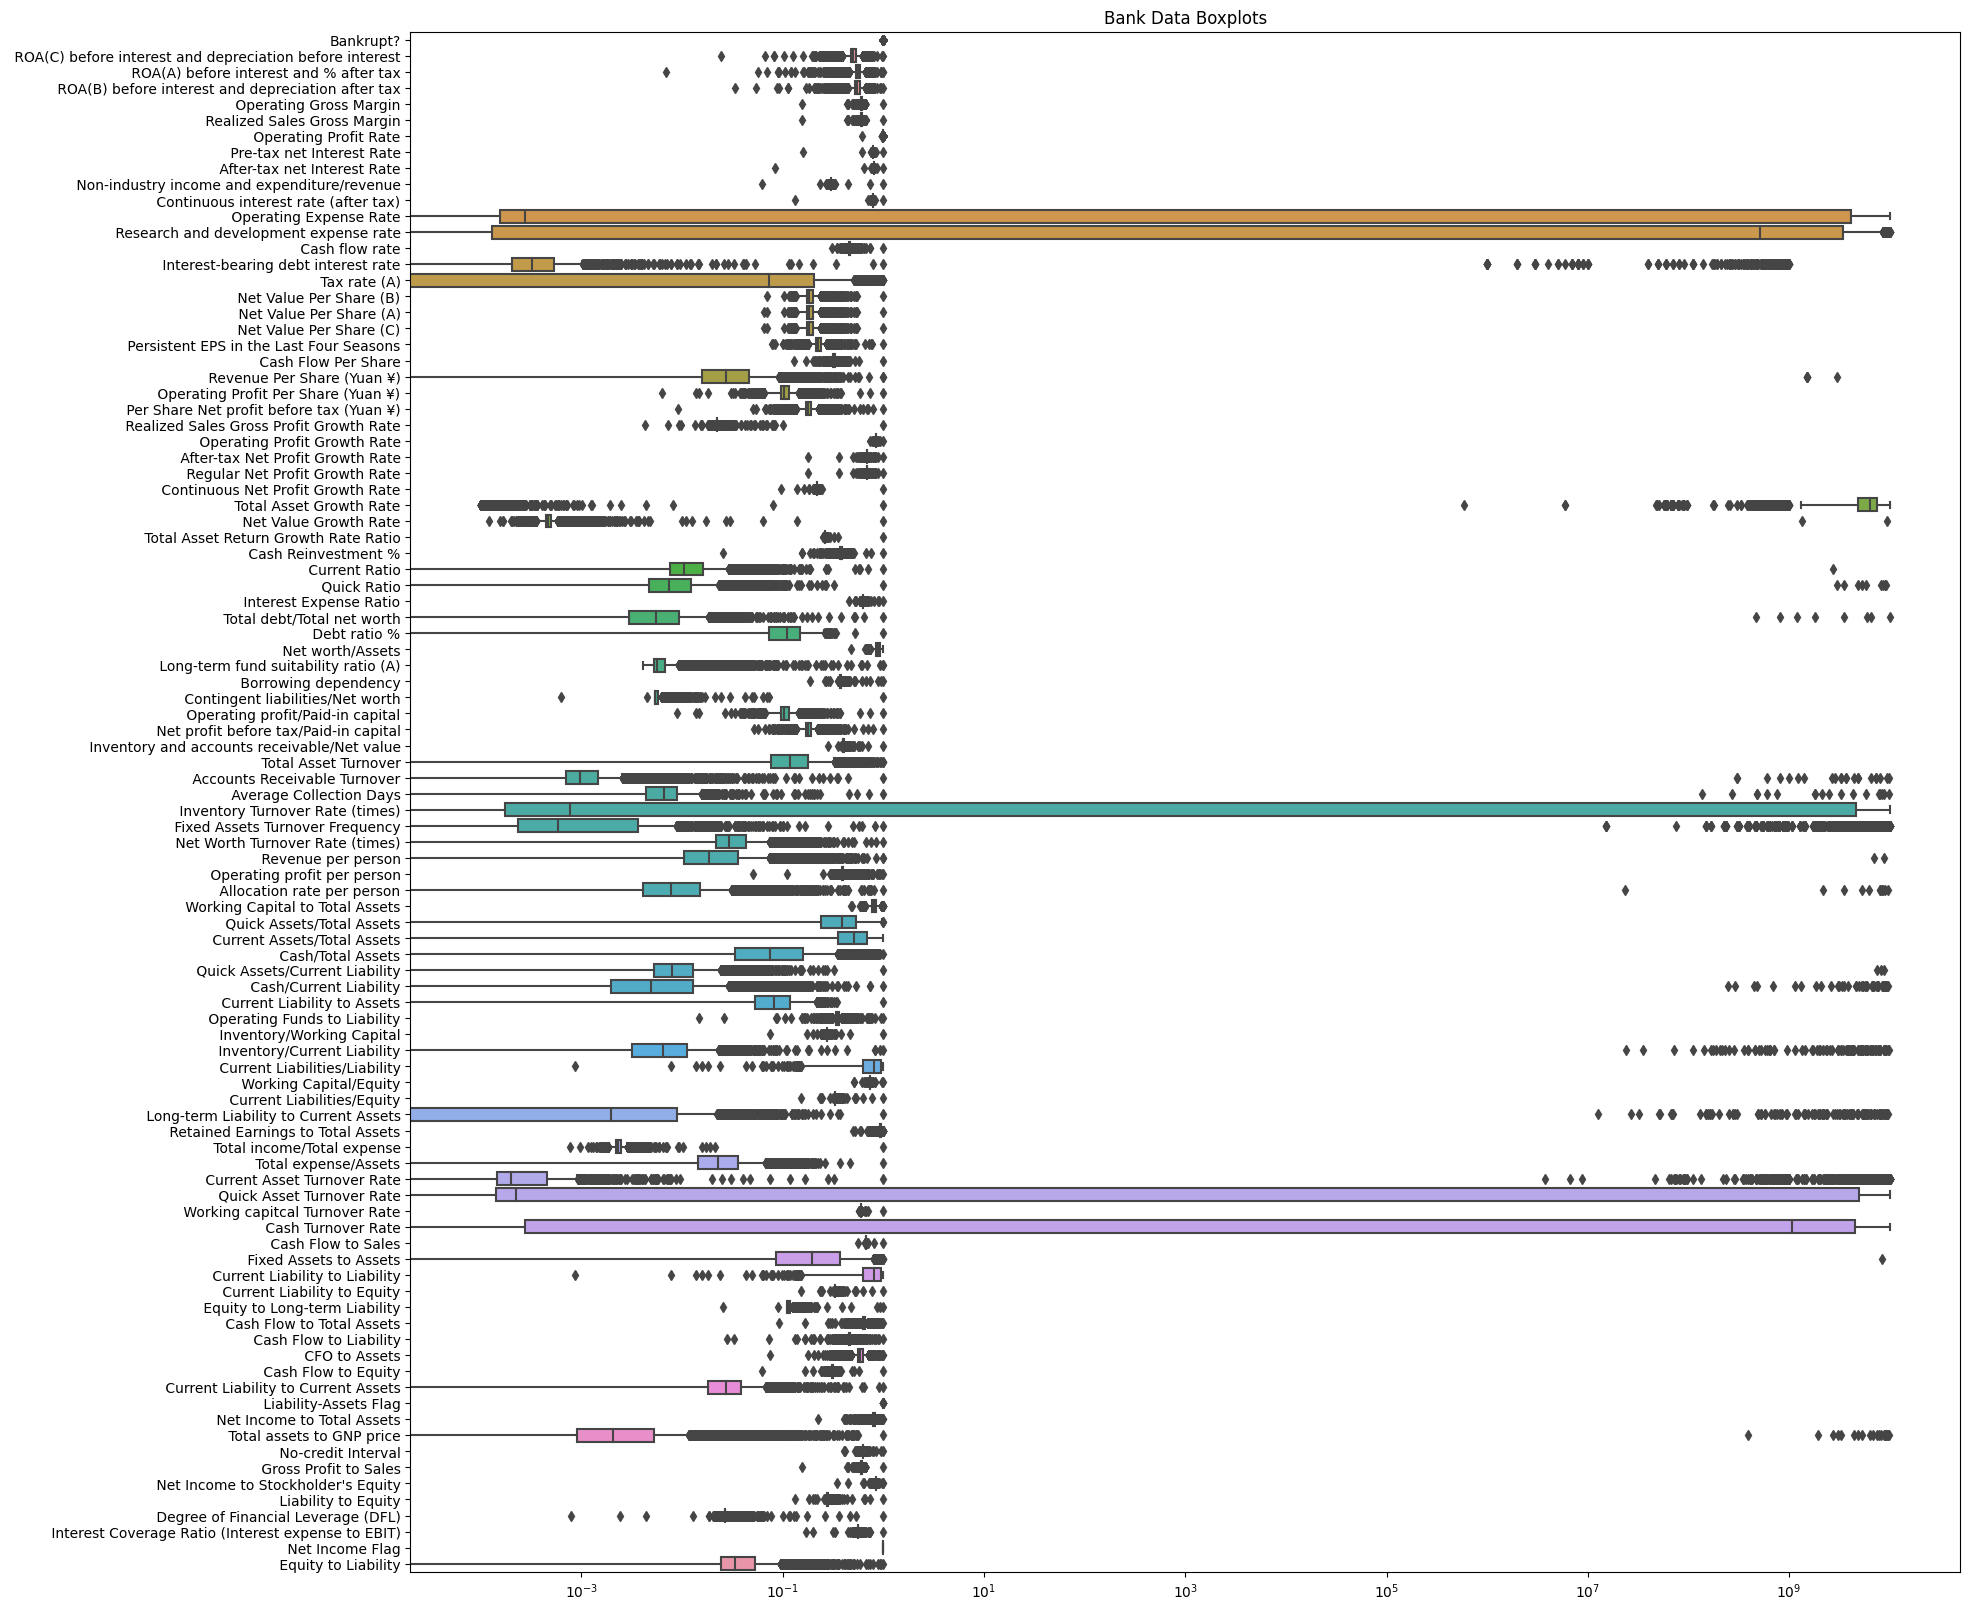

In [12]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = train, orient="h")
ax.set_title('Bank Data Boxplots')
ax.set(xscale="log")
plt.show()

As there are outliers we will replace them via imputer.

In [13]:
def replace_outliers_with_mean(feature):
    a = feature
    median = np.median(a)
    outlierConstant = 1.5
    upper_quartile = np.percentile(a, 95)
    lower_quartile = np.percentile(a, 5)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    # Find the outliers with 80% interval and replace them with median value 
    output = np.where((a >= quartileSet[0]) & (a <= quartileSet[1]), a, median)

    return output

In [14]:
new_train=train.copy()

In [15]:
for col in train:
    new_train[col] = replace_outliers_with_mean(new_train[col])

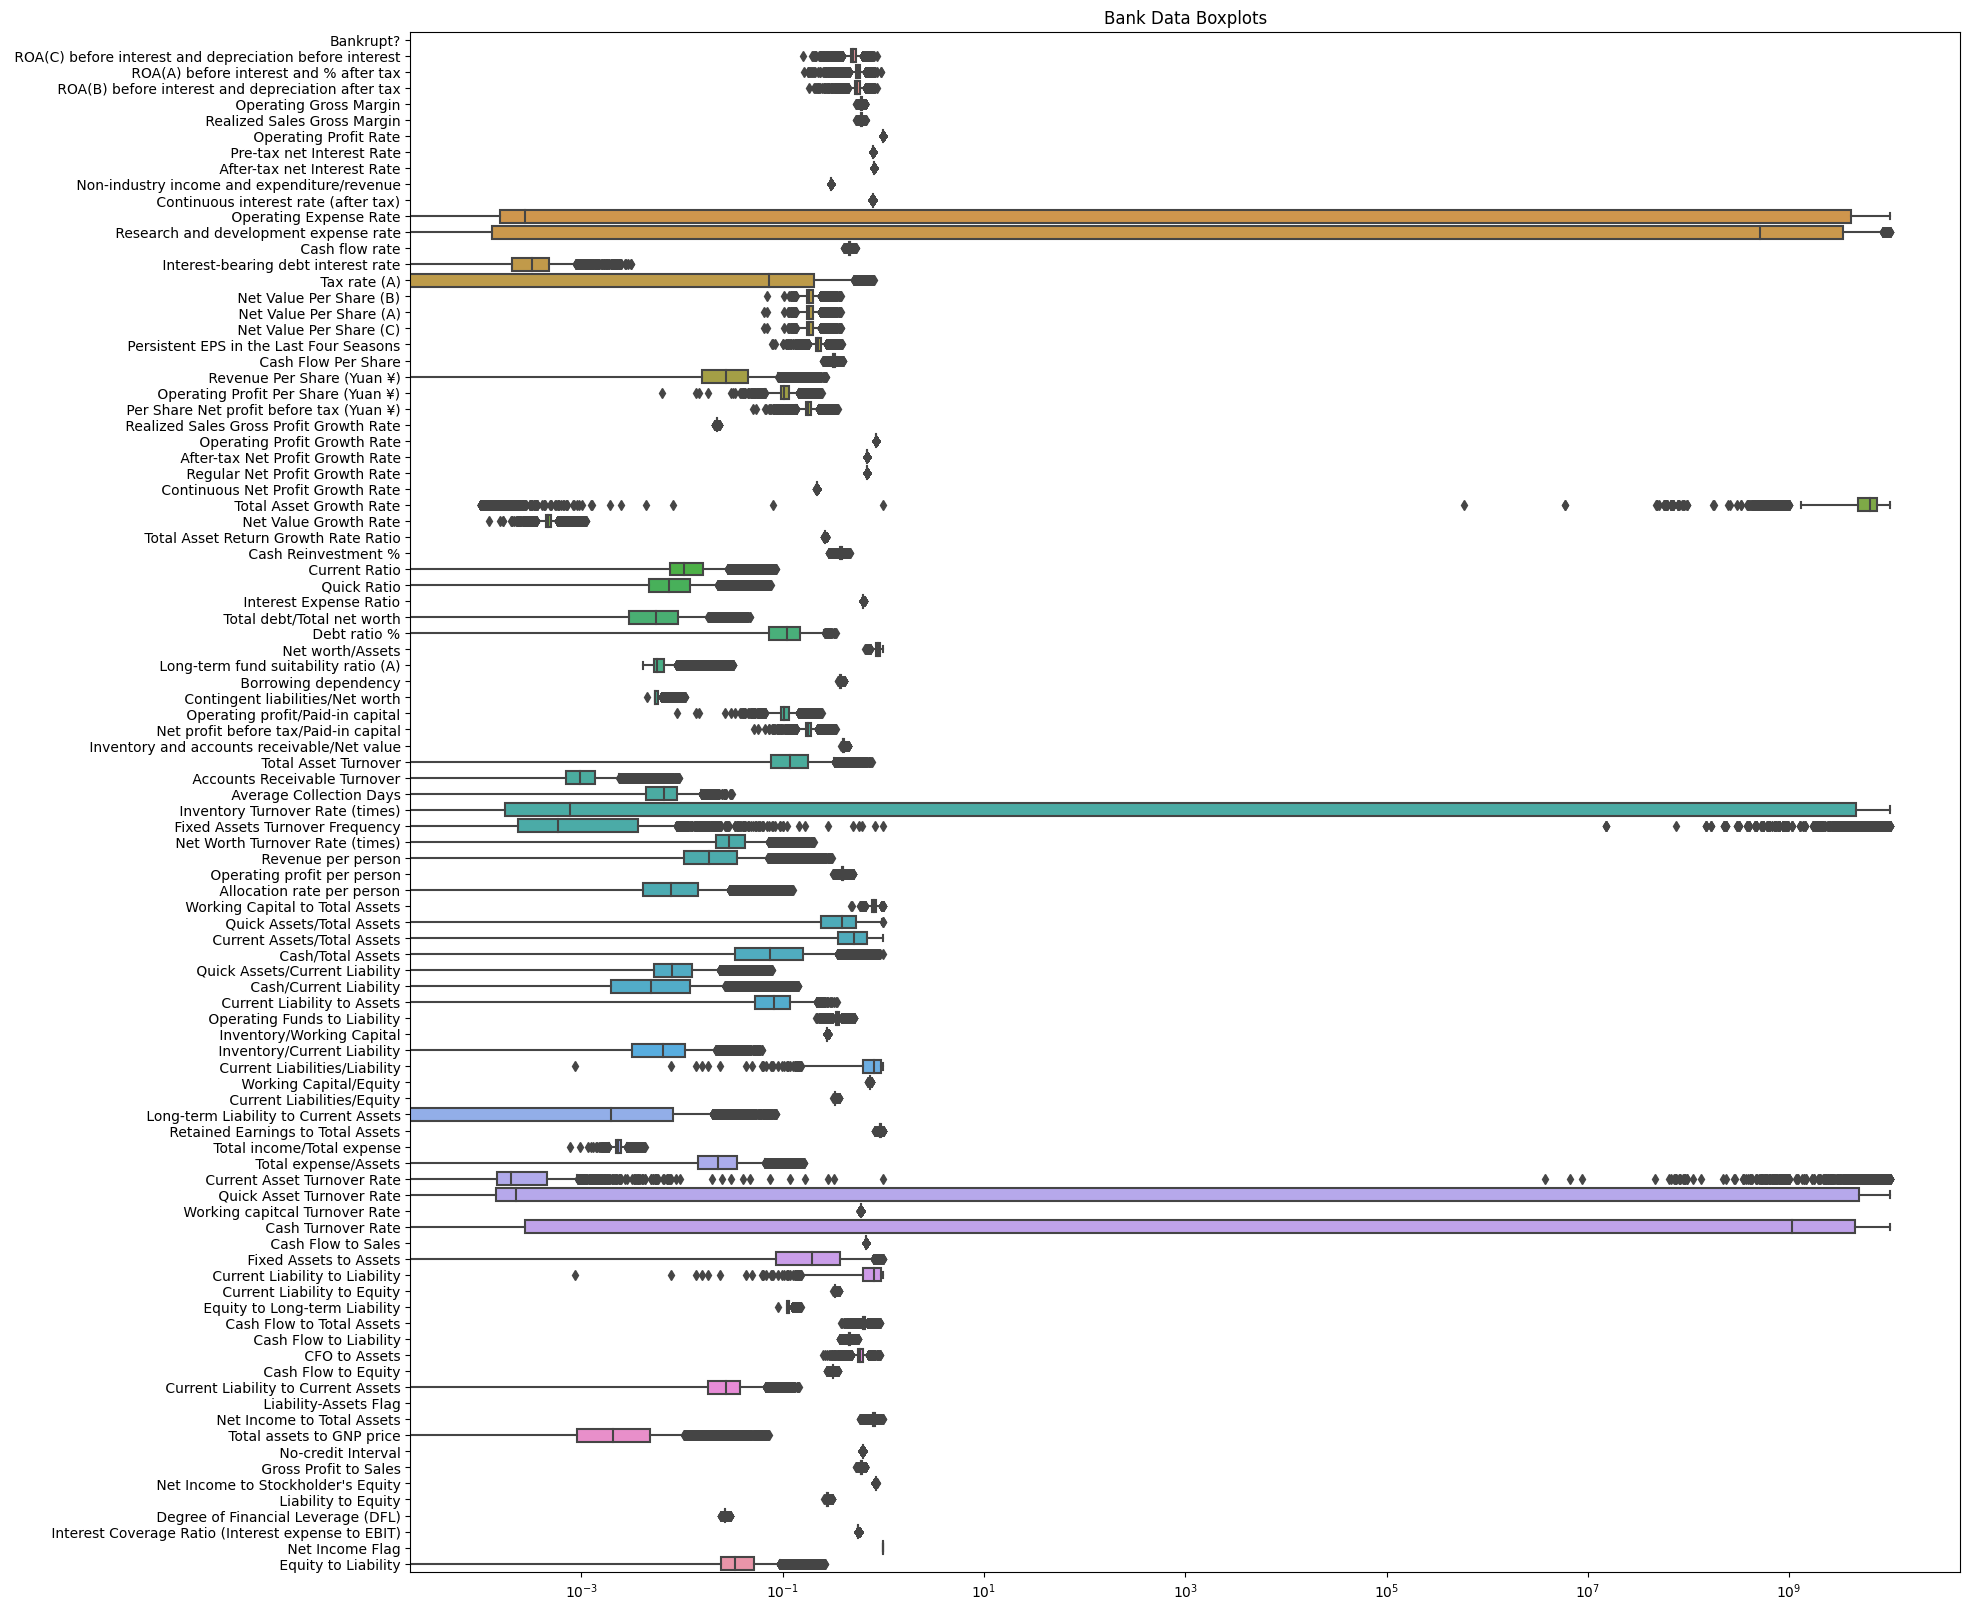

In [16]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = new_train, orient="h")
ax.set_title('Bank Data Boxplots')
ax.set(xscale="log")
plt.show()

In [17]:
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    #print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    #print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    #print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    #print('-' * 65)
    
    return dataset

for col in train:
    new_df = outliers_removal(train[col],str(col),train)

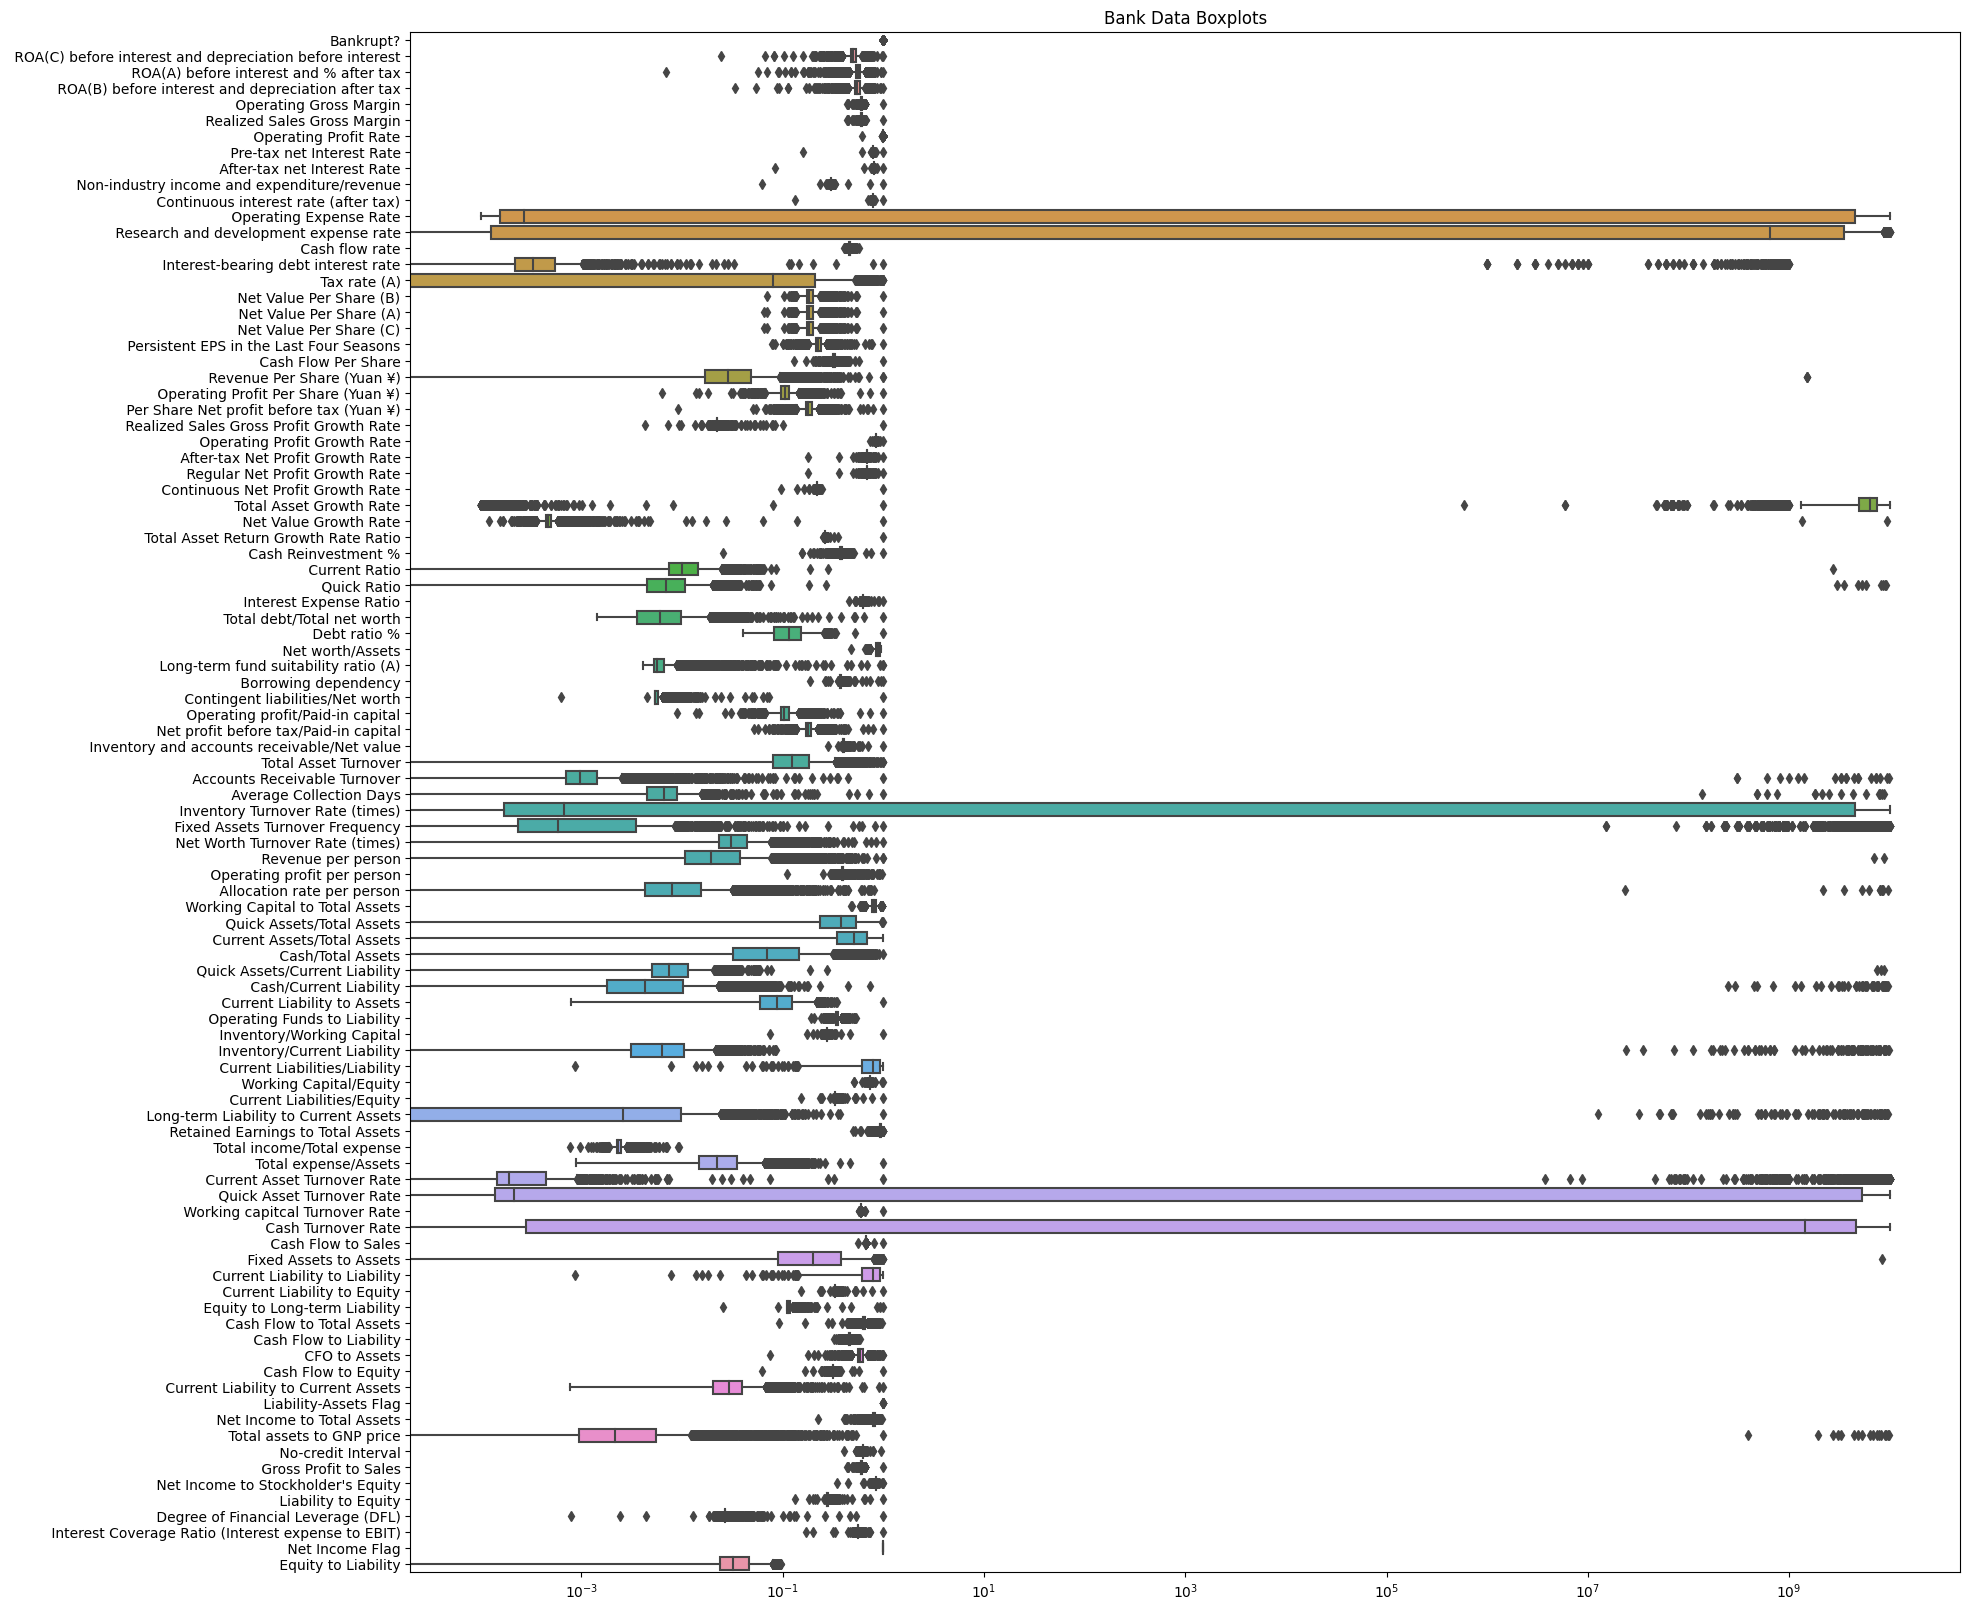

In [18]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = new_df, orient="h")
ax.set_title('Bank Data Boxplots')
ax.set(xscale="log")
plt.show()

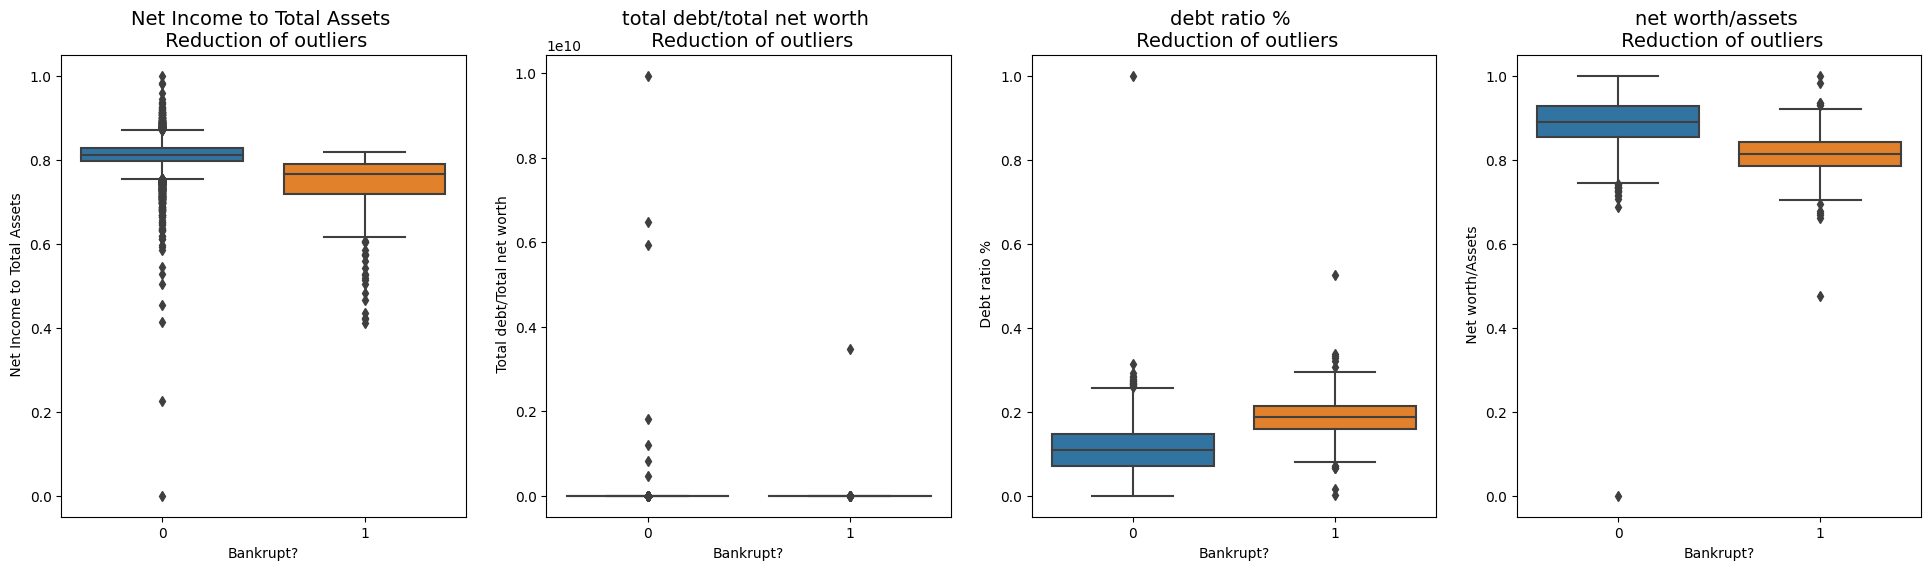

In [19]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y=" Net Income to Total Assets", data=train,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Total debt/Total net worth", data=train,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Debt ratio %", data=train,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Net worth/Assets', data=train,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)
        
plt.show()

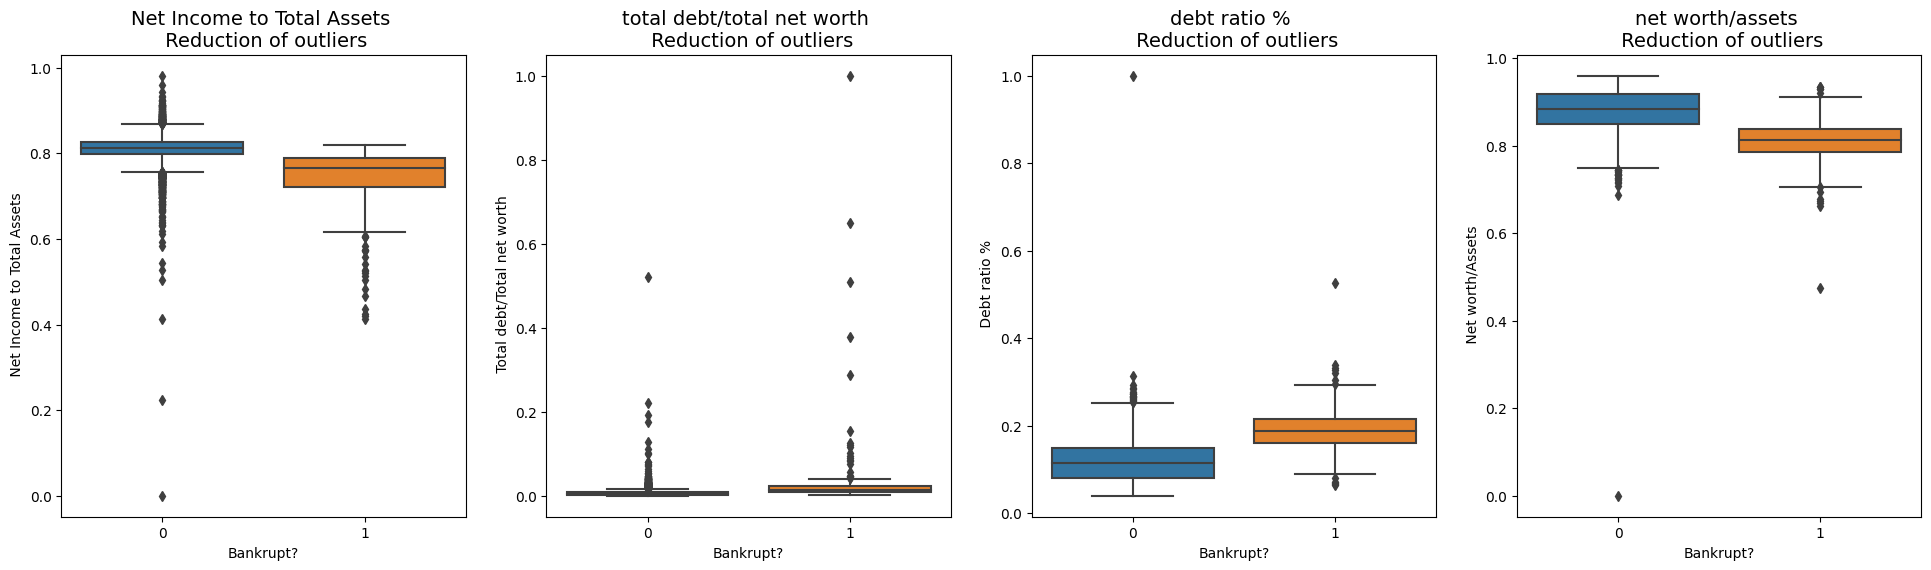

In [20]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y=" Net Income to Total Assets", data=new_df,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Total debt/Total net worth", data=new_df,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Debt ratio %", data=new_df,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Net worth/Assets', data=new_df,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)
        
plt.show()

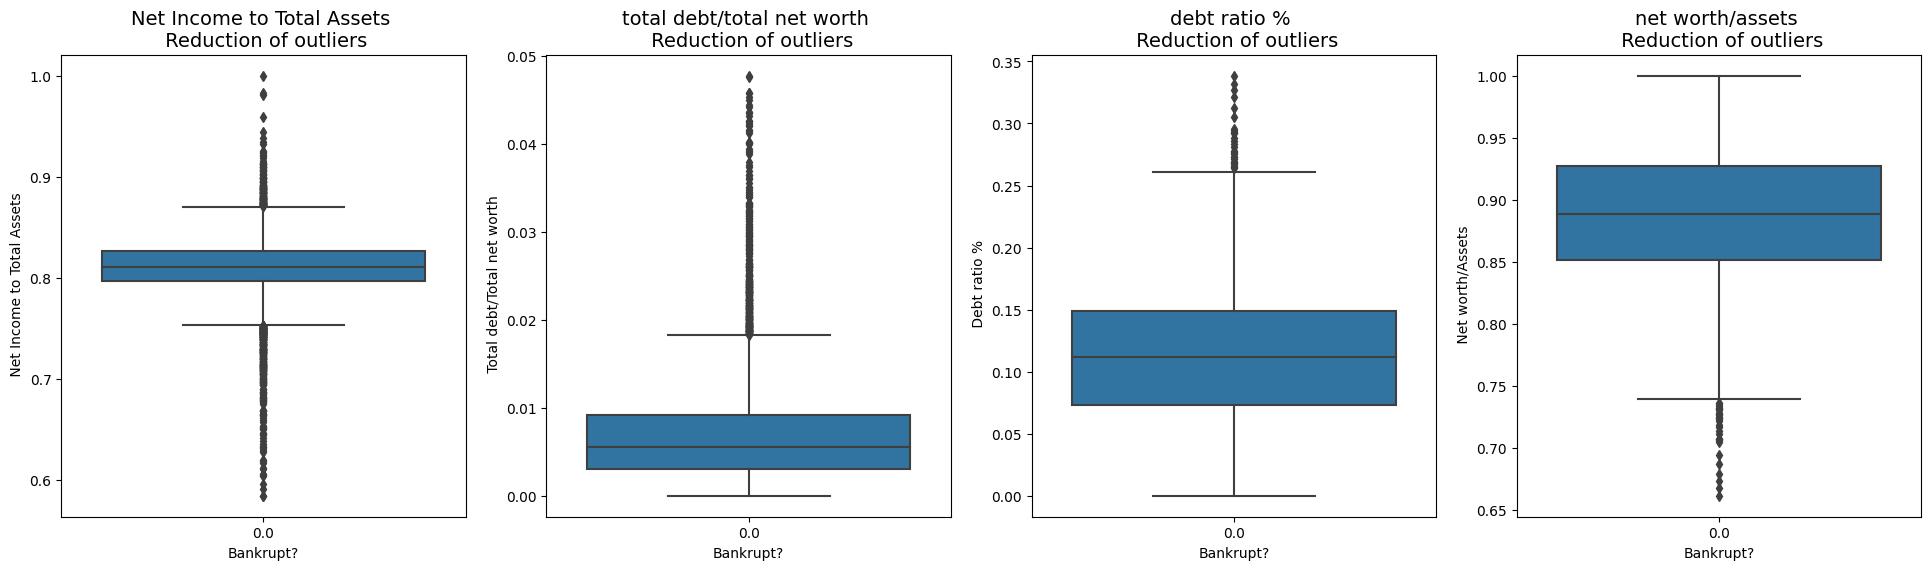

In [21]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y=" Net Income to Total Assets", data=new_train,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Total debt/Total net worth", data=new_train,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Debt ratio %", data=new_train,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Net worth/Assets', data=new_train,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)
        
plt.show()

Clear changes can be visible

From the given two distributions we can observe that in one many quantities have been altered and in the other they are dropped.

We will do the testing with both the results

#### As discussed above we have to deal with unbalance in dataset.

In [22]:
print('Number {}% of dataset is stable as of right now '.format(100*train['Bankrupt?'].value_counts()[0]/train.shape[0]))
print('Number {}% of dataset is unstable/Bankrupt  as of right now '.format(100*train['Bankrupt?'].value_counts()[1]/train.shape[0]))

Number 96.77372048687491% of dataset is stable as of right now 
Number 3.2262795131250916% of dataset is unstable/Bankrupt  as of right now 


In [23]:
labels = new_df['Bankrupt?']
new_df = new_df.drop(['Bankrupt?'], axis = 1)

In [24]:
print('labels shape:',labels.shape)
print('new_df shape:',new_df.shape)

labels shape: (6270,)
new_df shape: (6270, 95)


Oversampling the Target vaiable using SMOTE

In [25]:
from imblearn.over_sampling import SMOTE 
oversample = SMOTE()
new_df,labels=oversample.fit_resample(new_df,labels)

In [26]:
print('Number {}% of dataset is stable as of right now '.format(100*labels.value_counts()[0]/train.shape[0]))
print('Number {}% of dataset is unstable/Bankrupt  as of right now '.format(100*labels.value_counts()[1]/train.shape[0]))

Number 88.7520164246957% of dataset is stable as of right now 
Number 88.7520164246957% of dataset is unstable/Bankrupt  as of right now 


In [27]:
print('labels shape:',labels.shape)
print('new_df shape:',new_df.shape)

labels shape: (12104,)
new_df shape: (12104, 95)


# Modelling

In [28]:
#If time mile to isko bhi check karna
#labels_2=new_train['Bankrupt?']
#new_train=new_train.drop(['Bankrupt?'],axis=1)

Stratified Train-Test Splits:As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_new_modified=scaler.fit_transform(new_df)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(df_new_modified,
                                              labels,
                                              test_size=0.1,
                                              stratify = labels,
                                              random_state = 42)

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
log_reg.score(x_test,y_test)

0.9042113955408753

In [33]:
y_pred=log_reg.predict(x_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)

0.9042113955408753

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       606
           1       0.90      0.91      0.91       605

    accuracy                           0.90      1211
   macro avg       0.90      0.90      0.90      1211
weighted avg       0.90      0.90      0.90      1211



In [36]:
from sklearn.metrics import f1_score
f1score=f1_score(y_test,y_pred)*100
print('f1_score is: ',f1score) 

f1_score is:  90.50736497545009


### RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_features='sqrt',criterion='gini',random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [38]:
rfc.score(x_test,y_test)

0.9702725020644096

In [39]:
y_pred=rfc.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred)

0.9702725020644096

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       606
           1       0.95      0.99      0.97       605

    accuracy                           0.97      1211
   macro avg       0.97      0.97      0.97      1211
weighted avg       0.97      0.97      0.97      1211



In [42]:
from sklearn.metrics import f1_score
f1score=f1_score(y_test,y_pred)*100
print('f1_score is: ',f1score) 

f1_score is:  97.08265802269044


### XGBOOST

In [43]:
import xgboost as xgb
x_g_b=xgb.XGBClassifier(learning_rate=0.01,random_state = 42)
x_g_b.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [44]:
x_g_b.score(x_test,y_test)

0.9496284062758051

In [45]:
y_pred=x_g_b.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred)

0.9496284062758051

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       606
           1       0.93      0.97      0.95       605

    accuracy                           0.95      1211
   macro avg       0.95      0.95      0.95      1211
weighted avg       0.95      0.95      0.95      1211



In [48]:
from sklearn.metrics import f1_score
f1score=f1_score(y_test,y_pred)*100
print('f1_score is: ',f1score) 

f1_score is:  95.0766747376917


### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier 
k_n_n=KNeighborsClassifier()
k_n_n.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
k_n_n.score(x_test,y_test)

0.9463253509496284

In [51]:
y_pred=k_n_n.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred)

0.9463253509496284

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       606
           1       0.90      1.00      0.95       605

    accuracy                           0.95      1211
   macro avg       0.95      0.95      0.95      1211
weighted avg       0.95      0.95      0.95      1211



In [54]:
from sklearn.metrics import f1_score
f1score=f1_score(y_test,y_pred)*100
print('f1_score is: ',f1score) 

f1_score is:  94.90196078431373


As the data is not complex all the data perform quite well.